## Poisonous or Not?

In [42]:
!pip install -Uqq fastai

Searches for any updates.

In [43]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [44]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [45]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searches for photos on duckduckgo.

In [46]:
urls = search_images('poisonous snake photos', max_images=1)
urls[0]

Searching for 'poisonous snake photos'


'https://im.indiatimes.in/facebook/2018/Jun/poisonous_snake_creates_panic_at_vip_lounge_of_puducherry_airport_1529235229.jpg'

Searches for the poisonous snake.

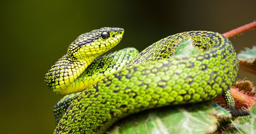

In [47]:
from fastdownload import download_url
dest = 'poisonoussnake.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searches for the non-posionous snake.

Searching for 'non-poisonous snake photos'


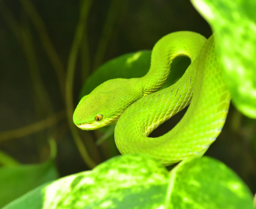

In [48]:
download_url(search_images('non-poisonous snake photos', max_images=1)[0], 'nonpoisonoussnake.jpg', show_progress=False)
Image.open('nonpoisonoussnake.jpg').to_thumb(256,256)

Does some searches for different scenarios: wild and zoo.

In [49]:
searches = 'non-poisonous snake','poisonous snake'
path = Path('poisonousornot')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} wild photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} zoo photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'non-poisonous snake photo'
Searching for 'non-poisonous snake wild photo'
Searching for 'non-poisonous snake zoo photo'
Searching for 'poisonous snake photo'
Searching for 'poisonous snake wild photo'
Searching for 'poisonous snake zoo photo'


Removes photos that have not downloaded correctly.

In [50]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

The training set used to train the AI, dataloaders.

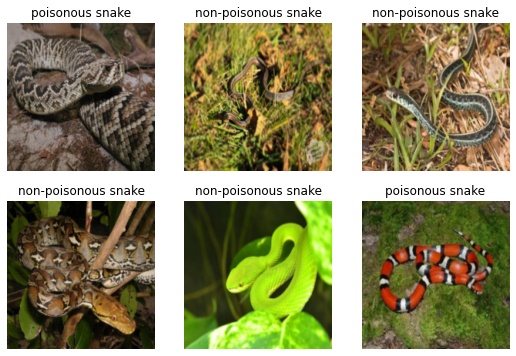

In [51]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Using resnet18 as it is trains the fastest.

In [52]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,1.426919,1.323055,0.516129,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.790587,0.686012,0.322581,00:01
1,0.724842,0.548266,0.290323,00:01
2,0.628775,0.550783,0.290323,00:01
3,0.531615,0.582813,0.225806,00:01
4,0.449009,0.604433,0.258065,00:01
5,0.368855,0.606455,0.258065,00:01
6,0.316794,0.600649,0.258065,00:01
7,0.273706,0.602177,0.258065,00:01
8,0.242982,0.647407,0.258065,00:01
9,0.219737,0.696773,0.258065,00:01


Runs the probability calculations

In [56]:
is_poisonous,_,probs = learn.predict(PILImage.create('nonpoisonoussnake.jpg'))
print(f"This is a {is_poisonous}.")
print(f"Probability it's a non poisonous snake: {probs[0]:.4f}")

This is a non-poisonous snake.
Probability it's a non poisonous snake: 1.0000


Result above